In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten


In [36]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [38]:
X_train = X_train/255.0
X_test = X_test/255.0

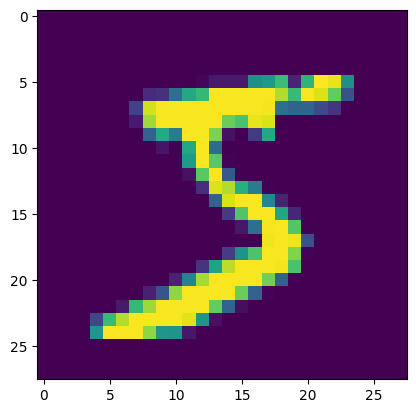

In [39]:
plt.imshow(X_train[0])

In [40]:
y_train


array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [41]:
model = Sequential()

In [42]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(120, activation=tf.keras.layers.LeakyReLU()))  #  LeakyReLU (defalut)
# we can also write like tf.keras.layers.LeakyReLU(alpha=0.1))) where alpha defines the slope for negative values
model.add(Dense(10, activation="softmax"))


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,410 (372.70 KB)

 Trainable params: 95,410 (372.70 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9063 - loss: 0.3244 - val_accuracy: 0.9467 - val_loss: 0.1969
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9485 - loss: 0.1786 - val_accuracy: 0.9588 - val_loss: 0.1502
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9611 - loss: 0.1326 - val_accuracy: 0.9576 - val_loss: 0.1460
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9682 - loss: 0.1060 - val_accuracy: 0.9677 - val_loss: 0.1112
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9739 - loss: 0.0859 - val_accuracy: 0.9671 - val_loss: 0.1124
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9774 - loss: 0.0719 - val_accuracy: 0.9672 - val_loss: 0.1113
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9804 - loss: 0.0631 - val_accuracy: 0.9662 - val_loss: 0.1143
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9824 - loss: 0.0553 - 

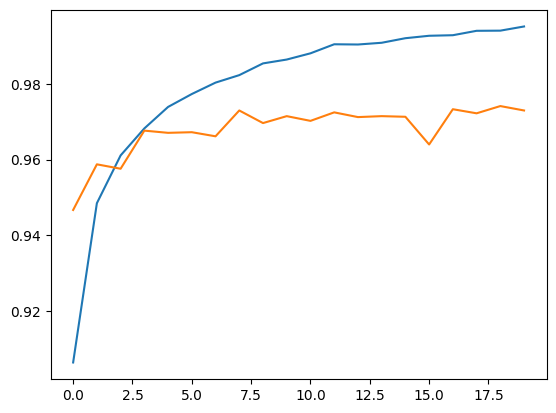

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

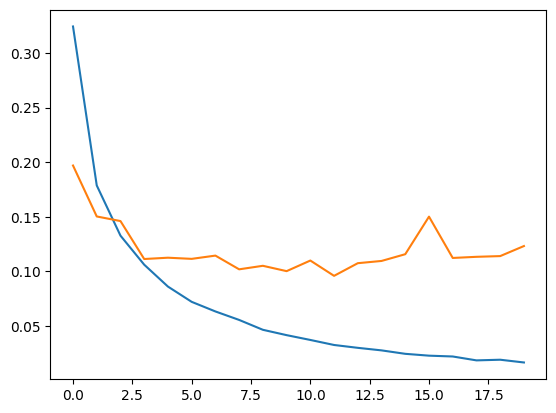

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])